# Data Exploration

Protocol buffer parsing Inspired by
https://stackoverflow.com/questions/38958751/parsing-nyc-transit-mta-historical-gtfs-data-not-realtime

This extracts data from the protobufs manually downloaded from [MTA Alert Archive](http://web.mta.info/developers/data/archives.html)the latest source suggested at:
https://groups.google.com/d/msg/mtadeveloperresources/Whm5XTVINcE/z-LO12ANAAAJ

**NOTE:** You'll first need to download and extract data.  See [Data README](../docs/Data_README.md), [StatusExtractor.ipynb](StatusExtractor.ipynb) and [AlertScraper.ipynb] This expects data to have been downloaded under <code>data/raw/status</code> and <code>data/raw/alerts</code>

In [1]:
import os
import sys
data_dir = '../data/raw/status'
protobuf_dir = '../MTADelayPredict/protobuf'

In [2]:
proto_file = os.path.join(os.path.join(protobuf_dir), 'gtfs-realtime.proto')
#! wget -O $proto_file https://developers.google.com/transit/gtfs-realtime/gtfs-realtime.proto

In [3]:
proto_file = os.path.join(os.path.join(protobuf_dir), 'nyct-subway.proto')
#! wget -O $proto_file https://api.mta.info/nyct-subway.proto.txt

In [4]:
#! protoc -I $protobuf_dir --python_out=$protobuf_dir $protobuf_dir/nyct-subway.proto $protobuf_dir/gtfs-realtime.proto

## Examine Alerts

First, fetch the alert from the downloaded alert data.

### Load alert historical data

In [5]:
import pandas as pd
import numpy as np
import os 

In [13]:
alert_dir = '../data/raw/alerts'
annotated_alert_df = pd.read_csv(os.path.abspath(os.path.join(alert_dir, 'nqrw_alerts_new.csv')))

In [14]:
annotated_alert_df[annotated_alert_df.Direction == 'Northbound']

Date Agency  \
0    2018-08-01 13:07:00    NYC   
1    2018-08-01 13:26:00    NYC   
6    2018-08-05 19:53:00    NYC   
28   2018-08-10 19:53:00    NYC   
29   2018-08-12 09:00:00    NYC   
..                   ...    ...   
283  2018-12-06 16:02:00    NYC   
286  2018-12-07 08:10:00    NYC   
287  2018-12-07 17:40:00    NYC   
288  2018-12-07 18:10:00    NYC   
289  2018-12-08 05:27:00    NYC   

                                               Subject   Direction  \
0    MANH, N, Q, R and W Trains, Unauthorized perso...  Northbound   
1    UPDATED: MANH, N, Q, R and W Trains, Unauthori...  Northbound   
6       UPDATED: MANH, N and R Trains, Signal problems  Northbound   
28               MANH, N and R Trains, Signal Problems  Northbound   
29      UPDATED: BKLYN, D, N, R Trains, Signal Problem  Northbound   
..                                                 ...         ...   
283   UPDATED: BKLYN, D, N and R Trains, FDNY Activity  Northbound   
286           MANH, N and Q Trains, Medical Assistance  Northbound   
287  MANH, N, Q, R and W Trains, Unauthorized Perso...  Northbound   
288  UPDATED: MANH, N, Q, R and W Trains, Unauthori...  Northbound   
289  UPDATED: BKLYN, D, N, Q and R Trains, Rail Rep...  Northbound   

           IssueStop AffectedTrains  \
0                NaN              R   
1                NaN              R   
6             49 St.     N, Q, R, W   
28   Lexington Av-59            N,R   
29     53 St (BKLYN)          D,N,R   
..               ...            ...   
283    36 St (Bklyn)        D, N, R   
286        Canal St.            N,Q   
287        8 St-NYU.            R,W   
288        8 St-NYU.           R, W   
289        Dekalb Av        D, N, R   

                                 Affected Stops Unnamed: 7  \
0                 57 St 7-Av,Lexington Av-63 St        NaN   
1                 57 St 7-Av,Lexington Av-63 St        NaN   
6                       Canal St,Times Sq-42 St        NaN   
28                             57 St 7-Av,96 St        NaN   
29                                          NaN        NaN   
..                                          ...        ...   
283  Coney Island-Stillwell Av,36 St (Brooklyn)      Local   
286                                         NaN        NaN   
287                    Canal St,34 St-Herald Sq    Express   
288                    Canal St,34 St-Herald Sq    Express   
289                     36 St (Bklyn),Canal St.    Express   

                                               Message  
0    Some northbound R trains are stopping along th...  
1    Some northbound R trains are stopping along th...  
6    Northbound N and R trains are running express ...  
28   Some northbound N trains are stopping along th...  
29   Northbound D, N and R trains are running with ...  
..                                                 ...  
283  D, N and R train service has resumed with dela...  
286  Northbound N and Q trains are running with del...  
287  Northbound R and W trains are running express ...  
288  Northbound R and W trains are now making local...  
289  Northbound D, N and R trains are running expre...  

[117 rows x 9 columns]

In [15]:
alert_dir = '../data/raw/alerts'
alert_df = pd.read_csv(os.path.abspath(os.path.join(alert_dir, 'raw_alerts_12.01.2018_12.31.2018.csv')))
alert_df.index = alert_df.Date.map(pd.to_datetime)
alert_df.drop(columns=['Date'], inplace=True)
alert_df.sort_index(inplace=True)

In [16]:
alert_df.head(10)

Agency                                            Subject  \
Date                                                                            
2018-12-01 00:25:00    NYC             UPDATED: MANH, A Trains, NYPD Activity   
2018-12-01 00:34:00    NYC           BKLYN, 2 and 4 Trains, Rail Replacement.   
2018-12-01 00:55:00    NYC                         MANH, 1 Trains, Vandalism.   
2018-12-01 00:57:00    NYC                UPDATED: MANH, 1 Trains, Vandalism.   
2018-12-01 00:58:00    NYC                UPDATED: MANH, 1 Trains, Vandalism.   
2018-12-01 01:35:00    NYC                   BX, 4 Trains, Track Maintenance.   
2018-12-01 01:45:00    NYC                 MANH, 2 Trains, Track Maintenance.   
2018-12-01 02:21:00    NYC           MANH, N and Q, Trains, Brakes Activated.   
2018-12-01 02:27:00    NYC  UPDATED: MANH, N and Q, Trains, Brakes Activated.   
2018-12-01 02:35:00    NYC                 MANH, 3 Trains, Track Maintenance.   

                                                               Message  
Date                                                                    
2018-12-01 00:25:00  Northbound A train service has resumed after e...  
2018-12-01 00:34:00  Northbound 2 and 4 trains are running express ...  
2018-12-01 00:55:00  Northbound 1 trains are delayed while we remov...  
2018-12-01 00:57:00  Northbound 1 train service has resumed after w...  
2018-12-01 00:58:00  Northbound 1 trains are no longer delayed afte...  
2018-12-01 01:35:00  Southbound 4 trains are bypassing 138 St-Grand...  
2018-12-01 01:45:00  Southbound 2 trains are running express from 9...  
2018-12-01 02:21:00  Northbound N and Q trains are holding in stati...  
2018-12-01 02:27:00  Northbound N and Q train service has resumed a...  
2018-12-01 02:35:00  Northbound 3 trains are running local from 72 ...

### Load subway gtfs statuses from this time period

Also download stop ID's to make this more easily explorable

In [17]:
#!wget -O $data_dir/Stations.csv http://web.mta.info/developers/data/nyct/subway/Stations.csv 
stations_df = pd.read_csv(data_dir + '/Stations.csv')
stations_df.index = stations_df['GTFS Stop ID']

In [18]:
# We are looking for station R16 aka Times Sq - 42 St
stations_df.loc['R16']

Station ID                                11
Complex ID                               611
GTFS Stop ID                             R16
Division                                 BMT
Line                     Broadway - Brighton
Stop Name                   Times Sq - 42 St
Borough                                    M
Daytime Routes                       N Q R W
Structure                             Subway
GTFS Latitude                        40.7547
GTFS Longitude                      -73.9868
North Direction Label        Uptown & Queens
South Direction Label    Downtown & Brooklyn
Name: R16, dtype: object

In [19]:
# Download some other stuff we need for processing data
#!wget -O $data_dir/google_transit.zip http://web.mta.info/developers/data/nyct/subway/google_transit.zip
#import zipfile
#with zipfile.ZipFile(data_dir+'/google_transit.zip') as zf:
#    zf.extractall(data_dir+'/google_transit')

In [20]:
stop_ids = pd.read_csv(data_dir+'/google_transit/stops.txt')

In [21]:
# Northbound Times Square stop
STOP_FILTER = '^R16N$'
stop_ids[stop_ids['stop_id'].str.match(STOP_FILTER)]

stop_id  stop_code         stop_name  stop_desc   stop_lat   stop_lon  \
1342    R16N        NaN  Times Sq - 42 St        NaN  40.754672 -73.986754   

      zone_id  stop_url  location_type parent_station  
1342      NaN       NaN              0            R16

In [22]:
! ls $data_dir/google_transit

agency.txt    calendar_dates.txt  shapes.txt	  stops.txt	 trips.txt
calendar.txt  routes.txt	  stop_times.txt  transfers.txt


## Parse Protobufs
Have a look at what is actually in these messages.

A great writeup of the mta gtfs feed contents can be found here: https://www.residentmar.io/2018/01/29/gtfs-tripify.html

In [23]:
import sys
sys.path.append(os.path.join(data_dir))
import nyct_subway_pb2
import gtfs_realtime_pb2

In [24]:
msg = gtfs_realtime_pb2.FeedMessage()

with open(os.path.join(data_dir, '201812/20181209/gtfs_nqrw_20181209_042657.gtfs'),'rb') as fh:
    msg.ParseFromString(fh.read())

In [25]:
print(msg)

header {
  gtfs_realtime_version: "1.0"
  incrementality: FULL_DATASET
  timestamp: 1544347617
  [nyct_feed_header] {
    nyct_subway_version: "1.0"
    trip_replacement_period {
      route_id: "N"
      replacement_period {
        end: 1544349417
      }
    }
    trip_replacement_period {
      route_id: "W"
      replacement_period {
        end: 1544349417
      }
    }
    trip_replacement_period {
      route_id: "Q"
      replacement_period {
        end: 1544349408
      }
    }
    trip_replacement_period {
      route_id: "R"
      replacement_period {
        end: 1544349404
      }
    }
  }
}
entity {
  id: "16000001"
  trip_update {
    trip {
      trip_id: "020158_N..S"
      start_date: "20181209"
      route_id: "N"
      [nyct_trip_descriptor] {
        train_id: "1N 0318+ QBP/STL"
        is_assigned: true
        direction: SOUTH
      }
    }
    stop_time_update {
      arrival {
        time: 1544347607
      }
      departure {
        time: 1544347607
      

## View our raw values

- min_in_station
- min_since_train
- wait_time
- baseline_wait_time

This requires raw data extraction in  [StatusExtractor.ipynb](StatusExctractor.ipynb) to have been run and dumped h5 data to disk.

In [26]:
# relative MTADelayPredict Project
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.realpath(os.path.join('DataExploration.ipynb')))))
from MTADelayPredict.data_processing import gtfs_loader

from importlib import reload


In [27]:
import glob
import os
import pandas as pd
import numpy as np
import sys
data_dir = '../data/raw/status'

start_date = pd.Timestamp('2018-08-01 00:00:00-04:00', tz='US/Eastern')
end_date = pd.Timestamp('2019-04-30 23:59:00-04:00', tz='US/Eastern')

drange = pd.date_range(start_date, end_date, freq='D')

file_list = []
status_dir = os.path.join(data_dir, 'status_northbound_n_new')

min_since_train_list = []
min_in_station_list = []
min_until_train_list = []

for date in drange:
    yyyymm = str(date.year * 100 + date.month)
    yyyymmdd = str(date.year * 10000 + date.month * 100 + date.day)
    filename = os.path.join(status_dir, yyyymm, '{}.h5'.format(yyyymmdd))
    if os.path.exists(filename):
        file_list.append(filename)
        min_since_train_list.append(pd.read_hdf(filename, 'min_since_train'))
        min_in_station_list.append(pd.read_hdf(filename, 'min_in_station'))
        min_until_train_list.append(pd.read_hdf(filename, 'min_until_train'))
    else:
        print("Missing {}".format(yyyymmdd))


Missing 20181009
Missing 20181028
Missing 20181029
Missing 20181030
Missing 20181211
Missing 20190124
Missing 20190406
Missing 20190407
Missing 20190408


In [28]:
min_since_train_df = pd.concat(min_since_train_list)
min_in_station_df = pd.concat(min_in_station_list)
min_until_train_df = pd.concat(min_until_train_list)

In [29]:
del min_since_train_list
del min_in_station_list
del min_until_train_list

# Examine train wait by time of day

During each how of the day, how long does one usually have to wait for the next train to come?

In [30]:
min_until_train_df['TOD'] = min_until_train_df.index.hour


(0.0, 60.0)

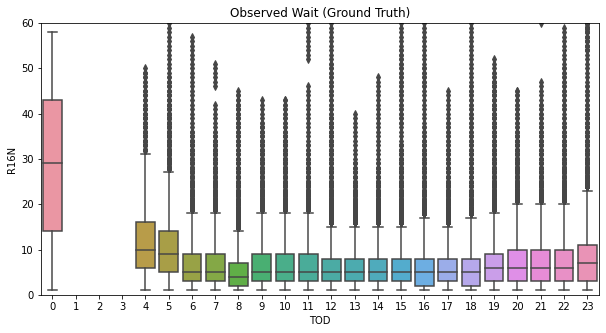

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
TIMES_SQUARE_STOPID = 'R16N'

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="TOD", y=TIMES_SQUARE_STOPID, data=min_until_train_df)
ax.set_title("Observed Wait (Ground Truth)")
ax.set_ylim([0, 60])

## Remove outliers by only examining train arrival times during peak times
Looking above, there are obviously long delays early morning.

Based on the MTA's schedule for northbound N trains, we expect train routes to be consistent from ~5:30AM-10:30PM [N Train Schedule](http://web.mta.info/nyct/service/pdf/tncur.pdf), with possibly different arrival rates.  Let's look at 6AM through 6PM for our first stab at this, as that should also cover the bulk of most people's use cases.



In [32]:
# Remove less predictable times of day
START_HOUR = 6
END_HOUR = 18

tod_mask = (min_until_train_df['TOD'] >= START_HOUR) & (min_until_train_df['TOD'] <= END_HOUR)
min_since_train_df = min_since_train_df[tod_mask]
min_in_station_df = min_in_station_df[tod_mask]
min_until_train_df = min_until_train_df[tod_mask]

# Calculate Baseline wait time model
Our baseline is, when does the MTA think trains will arrive.  We already collected each train's estimated arrival time for each station as it updates per minute.

That means that historically, for each day, have a <code>\[minute x stop_id x train_id \]</code>, this lets us learn a lot about when the MTA expected trains to arrive at stations, and compare our model, especially in degenerate cases like when there are MTA Service Alerts.

In [184]:
start_date = pd.Timestamp('2018-08-01 00:00:00-04:00', tz='US/Eastern')
end_date = pd.Timestamp('2019-04-30 23:59:00-04:00', tz='US/Eastern')

drange = pd.date_range(start_date, end_date, freq='D')

file_list = []
status_dir = os.path.join(data_dir, 'status_northbound_n_new')

next_scheduled_arrival_list = []

for date in drange:
    yyyymm = str(date.year * 100 + date.month)
    yyyymmdd = str(date.year * 10000 + date.month * 100 + date.day)
    filename = os.path.join(status_dir, yyyymm, '{}.h5'.format(yyyymmdd))
    if os.path.exists(filename):
        file_list.append(filename)
        next_scheduled_arrival_df = pd.read_hdf(filename, 'next_scheduled_arrival')
        
        
        # If we have already arrived, don't count them
        replace_mask = next_scheduled_arrival_df.apply(lambda x: x == next_scheduled_arrival_df.index.get_level_values(0))
        next_scheduled_arrival_df[replace_mask] = np.nan
        next_scheduled_arrival_df = next_scheduled_arrival_df.groupby(next_scheduled_arrival_df.index.get_level_values(1)).fillna(method='bfill').min(axis=1).reset_index()        
        next_scheduled_arrival_df.columns = ['minutes', 'stop_id', 'next_arrival']
        
        next_scheduled_arrival_df['next_arrival'] -= next_scheduled_arrival_df['minutes']
        
        next_scheduled_arrival_df = next_scheduled_arrival_df.pivot(index='minutes', columns='stop_id')
        next_scheduled_arrival_df.index = next_scheduled_arrival_df.index.map(lambda x: pd.to_datetime(x, unit='m', utc=True).tz_convert('US/Eastern'))
        next_scheduled_arrival_df.columns = next_scheduled_arrival_df.columns.droplevel(0)

        next_scheduled_arrival_list.append(next_scheduled_arrival_df)
    else:
        print("Missing {}".format(filename))
    
    

Missing ../data/raw/status/status_northbound_n_new/201810/20181009.h5
Missing ../data/raw/status/status_northbound_n_new/201810/20181028.h5
Missing ../data/raw/status/status_northbound_n_new/201810/20181029.h5
Missing ../data/raw/status/status_northbound_n_new/201810/20181030.h5
Missing ../data/raw/status/status_northbound_n_new/201812/20181211.h5
Missing ../data/raw/status/status_northbound_n_new/201901/20190124.h5
Missing ../data/raw/status/status_northbound_n_new/201904/20190406.h5
Missing ../data/raw/status/status_northbound_n_new/201904/20190407.h5
Missing ../data/raw/status/status_northbound_n_new/201904/20190408.h5


In [185]:
next_scheduled_arrival_df = pd.concat(next_scheduled_arrival_list)

In [186]:
next_scheduled_arrival_df.loc['2018-08-01 12:22:00-04:00':'2018-08-01 13:22:00-04:00', 'R16N']

minutes
2018-08-01 12:22:00-04:00    9.0
2018-08-01 12:23:00-04:00    8.0
2018-08-01 12:24:00-04:00    7.0
2018-08-01 12:25:00-04:00    6.0
2018-08-01 12:26:00-04:00    5.0
                            ... 
2018-08-01 13:18:00-04:00    1.0
2018-08-01 13:19:00-04:00    1.0
2018-08-01 13:20:00-04:00    1.0
2018-08-01 13:21:00-04:00    1.0
2018-08-01 13:22:00-04:00    1.0
Name: R16N, Length: 61, dtype: float64

In [224]:
next_scheduled_arrival_df['TOD'] = next_scheduled_arrival_df.index.hour

In [225]:
next_scheduled_arrival_df[next_scheduled_arrival_df< -100] = 0

Text(0.5, 1.0, 'MTA Predicted Wait Time')

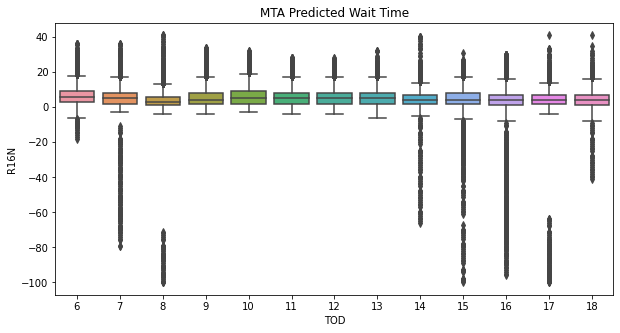

In [226]:
TIMES_SQUARE_STOPID = 'R16N'

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="TOD", y=TIMES_SQUARE_STOPID, data=next_scheduled_arrival_df)
ax.set_title("MTA Predicted Wait Time")
#ax.set_ylim([0, 60])

In [227]:
tod_mask = (next_scheduled_arrival_df['TOD'] >= 6) & (next_scheduled_arrival_df['TOD'] <= 18)
next_scheduled_arrival_df = next_scheduled_arrival_df[tod_mask]

In [228]:
# Fill NaN's
next_scheduled_arrival_df.fillna(method='bfill', inplace=True)

In [229]:
next_scheduled_arrival_df.to_hdf(os.path.join(data_dir, 'next_scheduled_arrival.h5'), key='df')

In [192]:
from sklearn.metrics import mean_squared_error
ground_truth = min_until_train_df.loc[min_until_train_df.index, TIMES_SQUARE_STOPID]
baseline_model = next_scheduled_arrival_df[TIMES_SQUARE_STOPID]
baseline_model.loc[ground_truth.map(np.isnan)] = np.nan


#mean_squared_error(baseline_model.dropna(), ground_truth.dropna(), squared=False)

/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Plot the ground truth vs. baseline model to see what it is doing around a time when I know there was a delay

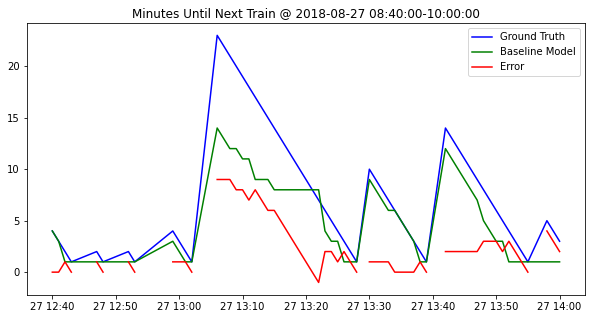

In [193]:
plt.figure(figsize=(10,5))
plt.plot(ground_truth['2018-08-27 08:40:00':'2018-08-27 10:00:00'].dropna(), color='blue', label='Ground Truth')
plt.plot(baseline_model['2018-08-27 08:40:00':'2018-08-27 10:00:00'].dropna(), color='green', label='Baseline Model')
diff = (ground_truth-baseline_model)['2018-08-27 08:40:00':'2018-08-27 10:00:00']
plt.plot(diff, color='red', label='Error')
ax = plt.gca()
ax.set_title("Minutes Until Next Train @ 2018-08-27 08:40:00-10:00:00")
ax.legend()

# What's all this then?
- The gaps are because we don't pay attention when there is a train currently in the station.
- The baseline model seems to consistently mispredict the last couple of minutes before arriving in the station, in particular, predicting that it will arrive in the next minute starting when it is > 1 minute away

In [194]:
compare_df = pd.concat([min_in_station_df[TIMES_SQUARE_STOPID], ground_truth,baseline_model], \
              join='inner', axis=1
              )
compare_df.columns = ['Minutes In Station', 'Ground Truth Wait Time', 'Baseline Model Wait Time']

def highlight_ones(s):
    '''
    highlight any groups of ones
    '''
    is_repeating = ((s == s.shift(1)) & (s == 1.0)) | ((s == s.shift(-1))& (s == 1.0)) 
    return ['background-color: yellow' if v else '' for v in is_repeating]

compare_df['2018-08-27 13:05:00':'2018-08-27 13:20:00'].style.apply(highlight_ones)

# Examine train wait times against status alerts

In [195]:
# Find if alerts are predictive
# Get a list of alert times for N train
import numpy as np
alert_dir = '../data/raw/alerts'
alert_files = glob.glob(os.path.abspath(os.path.join(alert_dir, 'raw_alerts_*.csv')))
alert_list = []
for f in alert_files:
    alert_list.append(pd.read_csv(f))
alert_df = pd.concat(alert_list)
alert_df.index = alert_df.Date.map(pd.to_datetime)
alert_df.drop(columns=['Date'], inplace=True)
alert_df.sort_index(inplace=True)

In [196]:
alert_df['2018-8-27'].head()

Agency                                           Subject  \
Date                                                                           
2018-08-27 01:27:00    NYC        QNS, 7 Trains, Temporary Track Maintenance   
2018-08-27 01:39:00    NYC           BX, 4 Trains, Garbage Can on the Tracks   
2018-08-27 02:22:00    NYC  UPDATED: BX, 4 Trains, Garbage Can on the Tracks   
2018-08-27 03:08:00    NYC                 MANH, 1 Trains, Track Maintenance   
2018-08-27 04:10:00    NYC        UPDATED: MANH, 1 Trains, Track Maintenance   

                                                               Message  
Date                                                                    
2018-08-27 01:27:00  7 trains in both directions are stopping on th...  
2018-08-27 01:39:00  Northbound 4 trains are running express from 1...  
2018-08-27 02:22:00  4 service has resumed as our crews removed a g...  
2018-08-27 03:08:00  Southbound 1 trains are running express from 1...  
2018-08-27 04:10:00  1 train service has resumed following earlier ...

In [197]:
train_alerts = alert_df.copy()
train_alerts = train_alerts.sort_index()

In [198]:
#train_alerts.loc['2018-08-01':'2019-06-30'].between_time('5:00','21:00').to_csv(alert_dir+'/nqrw_alerts.csv')

In [199]:
# Add some predictors for the train_alerts
import re
subject_regex = r'^(?P<updated>UPDATED)?:? ?(?P<borough>[A-Z]+), (?P<trains>.*) Trains?, (?P<alert_type>.*)$'
message_regex = r'^(P<direction>Northbound|Southbound|Westbound|Eastbound)?.*$'


In [200]:
train_alerts.Message[25]

'Some Canarsie bound L trains end at Myrtle-Wyckoff Avs because of signal problems at Canarsie-Rockaway Pkwy. Expect delays in both directions.'

In [201]:
alert_features = train_alerts.Subject.str.extract(subject_regex)
alert_features['updated'] = alert_features['updated'] == 'UPDATED'

for train in ['N', 'Q', 'R', 'W']:
    alert_features[train] = alert_features['trains'].str.contains(train)
    
alert_features['direction'] = train_alerts.Message.str.extract(message_regex)[0].fillna('')
alert_features['delays'] = train_alerts.Message.str.match('.*delay.*')
alert_features.drop(columns='trains', inplace=True)
alert_features.head()

updated borough                   alert_type      N  \
Date                                                                       
2018-01-01 00:20:00     True    MANH  New Year's Eve Celebrations  False   
2018-01-01 00:20:00     True    MANH              Signal Problems   True   
2018-01-01 00:24:00     True      BX              Switch Problems  False   
2018-01-01 01:13:00     True    MANH  New Year's Eve Celebrations  False   
2018-01-01 02:50:00    False    MANH              Signal Problems   True   

                         Q      R      W   direction  delays  
Date                                                          
2018-01-01 00:20:00  False  False  False                True  
2018-01-01 00:20:00  False   True  False  Southbound    True  
2018-01-01 00:24:00  False  False  False               False  
2018-01-01 01:13:00  False  False  False               False  
2018-01-01 02:50:00   True  False  False  Southbound   False

# Calculate for each minute, how long since the last status alert was seen

In [202]:
alert_filter = alert_features.N.values


In [203]:
compare_df['LastAlertTime'] = pd.Timestamp(np.nan)
compare_df['NextAlertTime'] = pd.Timestamp(np.nan)


# Set up a mask for choosing our alerts...
# We only want N trains
alert_filter = alert_features['N'].values.astype('bool')
# We don't want alerts that are telling us service has resumed
alert_filter &= ~(alert_df.Message.str.match(r'.*resumed.*').values)
alert_filter &= alert_df.Message.str.match(r'Northbound').values

train_alerts = alert_df.loc[alert_filter]
train_alerts = train_alerts.sort_index()

final_ts1 = None
final_ts2 = None
for i,ts in enumerate(train_alerts.index[:-1]):
    ts1 = pd.Timestamp(ts, tz='US/Eastern')
    ts2 = pd.Timestamp(train_alerts.index[i+1], tz='US/Eastern')
    compare_df.loc[ts1:ts2, 'LastAlertTime'] = ts1
    compare_df.loc[ts1:ts2, 'NextAlertTime'] = ts2
    final_ts1 = ts1
    final_ts2 = ts2
compare_df.loc[final_ts2:, 'LastAlertTime'] = final_ts1
compare_df.loc[final_ts2:, 'NextAlertTime'] = final_ts2

for x,y in zip(compare_df.index, compare_df['LastAlertTime']):
    if y:
        compare_df.loc[x, 'MinSinceAlert'] = (x-y).total_seconds() / 60.0
    
for x,y in zip(compare_df.index, compare_df['NextAlertTime']):
    if y:
        compare_df.loc[x, 'MinUntilAlert'] = (y-x).total_seconds() / 60.0

In [204]:
compare_df[['MinUntilAlert', 'MinSinceAlert']].to_hdf(os.path.join(alert_dir, 'alert_times.h5'), key='alert_times')

In [205]:
wait_time = compare_df.copy()
wait_time['TOD'] = wait_time.index.hour

# Compare the wait time distribution when there is an alert against when there isn't an alert

Compare the distribution of wait times for 60 minutes after a status alert vs. behavior when there is no status alert

In [206]:
wait_time.head()

Minutes In Station  Ground Truth Wait Time  \
2018-08-01 06:00:00-04:00                 NaN                    17.0   
2018-08-01 06:01:00-04:00                 NaN                    16.0   
2018-08-01 06:02:00-04:00                 NaN                    15.0   
2018-08-01 06:03:00-04:00                 NaN                    14.0   
2018-08-01 06:04:00-04:00                 NaN                    13.0   

                           Baseline Model Wait Time  \
2018-08-01 06:00:00-04:00                      18.0   
2018-08-01 06:01:00-04:00                      16.0   
2018-08-01 06:02:00-04:00                      15.0   
2018-08-01 06:03:00-04:00                      16.0   
2018-08-01 06:04:00-04:00                      15.0   

                                       LastAlertTime  \
2018-08-01 06:00:00-04:00  2018-07-31 18:34:00-04:00   
2018-08-01 06:01:00-04:00  2018-07-31 18:34:00-04:00   
2018-08-01 06:02:00-04:00  2018-07-31 18:34:00-04:00   
2018-08-01 06:03:00-04:00  2018-07-31 18:34:00-04:00   
2018-08-01 06:04:00-04:00  2018-07-31 18:34:00-04:00   

                                       NextAlertTime  MinSinceAlert  \
2018-08-01 06:00:00-04:00  2018-08-02 21:33:00-04:00          686.0   
2018-08-01 06:01:00-04:00  2018-08-02 21:33:00-04:00          687.0   
2018-08-01 06:02:00-04:00  2018-08-02 21:33:00-04:00          688.0   
2018-08-01 06:03:00-04:00  2018-08-02 21:33:00-04:00          689.0   
2018-08-01 06:04:00-04:00  2018-08-02 21:33:00-04:00          690.0   

                           MinUntilAlert  TOD  
2018-08-01 06:00:00-04:00         2373.0    6  
2018-08-01 06:01:00-04:00         2372.0    6  
2018-08-01 06:02:00-04:00         2371.0    6  
2018-08-01 06:03:00-04:00         2370.0    6  
2018-08-01 06:04:00-04:00         2369.0    6

In [207]:
ALERT_WINDOW = 30
#wait_time.loc[wait_time['Ground Truth Wait Time'] > ALERT_WINDOW] = ALERT_WINDOW
wait_time['Alerted'] = wait_time['MinSinceAlert'] <= ALERT_WINDOW


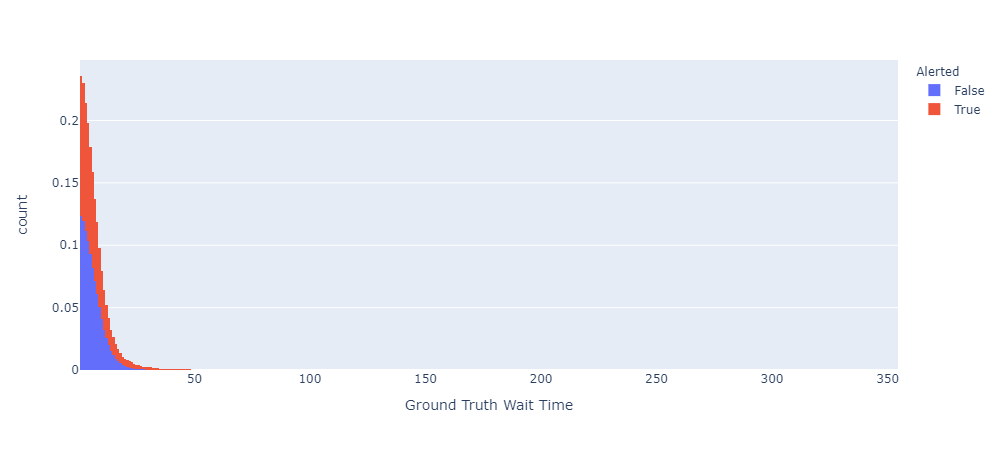

In [208]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(wait_time, x='Ground Truth Wait Time', color='Alerted', histnorm='probability')
fig.show()


In [209]:
wait_time[wait_time['Alerted']]['Ground Truth Wait Time'].describe(percentiles=[.25, .5, .75, .90, .95, .98])

count    6242.000000
mean        7.336270
std         6.978108
min         1.000000
25%         3.000000
50%         5.000000
75%         9.000000
90%        15.000000
95%        21.000000
98%        29.000000
max        57.000000
Name: Ground Truth Wait Time, dtype: float64

In [210]:
wait_time[~wait_time['Alerted']]['Ground Truth Wait Time'].describe(percentiles=[.25, .5, .75, .90, .95, .98])

count    150641.000000
mean          6.054401
std           5.618549
min           1.000000
25%           3.000000
50%           5.000000
75%           8.000000
90%          12.000000
95%          15.000000
98%          18.000000
max         354.000000
Name: Ground Truth Wait Time, dtype: float64

Why are there bigger tails when there hasn't been an alert?

In [211]:
wait_time.loc['2018-08-01 13:26:00':'2018-08-01 13:30:00']

Minutes In Station  Ground Truth Wait Time  \
2018-08-01 13:26:00-04:00                 3.0                     NaN   
2018-08-01 13:27:00-04:00                 NaN                    12.0   
2018-08-01 13:28:00-04:00                 NaN                    11.0   
2018-08-01 13:29:00-04:00                 NaN                    10.0   
2018-08-01 13:30:00-04:00                 NaN                     9.0   

                           Baseline Model Wait Time  \
2018-08-01 13:26:00-04:00                       NaN   
2018-08-01 13:27:00-04:00                      11.0   
2018-08-01 13:28:00-04:00                      10.0   
2018-08-01 13:29:00-04:00                       9.0   
2018-08-01 13:30:00-04:00                       8.0   

                                       LastAlertTime  \
2018-08-01 13:26:00-04:00  2018-07-31 18:34:00-04:00   
2018-08-01 13:27:00-04:00  2018-07-31 18:34:00-04:00   
2018-08-01 13:28:00-04:00  2018-07-31 18:34:00-04:00   
2018-08-01 13:29:00-04:00  2018-07-31 18:34:00-04:00   
2018-08-01 13:30:00-04:00  2018-07-31 18:34:00-04:00   

                                       NextAlertTime  MinSinceAlert  \
2018-08-01 13:26:00-04:00  2018-08-02 21:33:00-04:00         1132.0   
2018-08-01 13:27:00-04:00  2018-08-02 21:33:00-04:00         1133.0   
2018-08-01 13:28:00-04:00  2018-08-02 21:33:00-04:00         1134.0   
2018-08-01 13:29:00-04:00  2018-08-02 21:33:00-04:00         1135.0   
2018-08-01 13:30:00-04:00  2018-08-02 21:33:00-04:00         1136.0   

                           MinUntilAlert  TOD  Alerted  
2018-08-01 13:26:00-04:00         1927.0   13    False  
2018-08-01 13:27:00-04:00         1926.0   13    False  
2018-08-01 13:28:00-04:00         1925.0   13    False  
2018-08-01 13:29:00-04:00         1924.0   13    False  
2018-08-01 13:30:00-04:00         1923.0   13    False

# Look at train behavior around delays

See this [AlertDash.ipynb](AlertDash.ipynb) to run a Plotly Dash page for exploring different alerts for Northbound N trains

# TODO: Pull plotting code from Alert Dash Notebook into modules for either easy plotly plotting, or use in Dash

### Observations:
- Trains arrive faster after delay alerts, in many cases, the MTA alert goes out *after* the observed train issues.  Based on observations, this is because many delayed trains are "release" and start running a little more bunched up, so if a delay happened down-line, trains will be arriving more frequently

In [212]:
# Create features from minutes data
from MTADelayPredict.features import feature_builder

features = feature_builder.FeatureBuilder(min_in_station_df, min_since_train_df)
features_df = features.features

# Imbalanced Data
We care the most about the tails, how frequently is there data affected by an alert.


In [213]:
wait_time[wait_time['Alerted']]['Ground Truth Wait Time'].describe(percentiles=[.25, .5, .75, .90, .95, .98])

count    6242.000000
mean        7.336270
std         6.978108
min         1.000000
25%         3.000000
50%         5.000000
75%         9.000000
90%        15.000000
95%        21.000000
98%        29.000000
max        57.000000
Name: Ground Truth Wait Time, dtype: float64

In [214]:
wait_time[~wait_time['Alerted']]['Ground Truth Wait Time'].describe(percentiles=[.25, .5, .75, .90, .95, .98])

count    150641.000000
mean          6.054401
std           5.618549
min           1.000000
25%           3.000000
50%           5.000000
75%           8.000000
90%          12.000000
95%          15.000000
98%          18.000000
max         354.000000
Name: Ground Truth Wait Time, dtype: float64

In [215]:
(wait_time['Alerted'] & (wait_time['Ground Truth Wait Time'] > 15)).sum() / (wait_time['Alerted']).sum()

0.0735

In [216]:
(wait_time['Ground Truth Wait Time'] > 15).sum() / (wait_time['Ground Truth Wait Time']).sum()

0.006854006017744202

# MTA Status Alerts are not in and of themselves a perfect indicator of delays
At least, looking at all northbound delays 